In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import squarify 

In [181]:
df = pd.read_csv('PPP_ORIGINAL.csv', parse_dates=["DateApproved"]).drop_duplicates()
df.head(10)

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,a $5-10 million,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723.0,813920.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,295.0,2020-04-14,"National Cooperative Bank, National Association",AK - 00
1,a $5-10 million,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,99645.0,238190.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,215.0,2020-04-15,First National Bank Alaska,AK - 00
2,a $5-10 million,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,99503.0,722310.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,367.0,2020-04-11,KeyBank National Association,AK - 00
3,a $5-10 million,KATMAI HEALTH SERVICES LLC,"11001 O'MALLEY CENTRE DRIVE, SUITE 204",ANCHORAGE,AK,99515.0,621111.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,2020-04-29,Truist Bank d/b/a Branch Banking & Trust Co,AK - 00
4,a $5-10 million,MATANUSKA TELEPHONE ASSOCIATION,1740 S. CHUGACH ST,PALMER,AK,99645.0,517311.0,Cooperative,Unanswered,Unanswered,Unanswered,NaN,267.0,2020-06-10,CoBank ACB,AK - 00
5,a $5-10 million,"NANA WORLEY, LLC","3700 Centerpoint Drive, 7th floor",ANCHORAGE,AK,99503.0,541330.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,231.0,2020-05-19,First National Bank Alaska,AK - 00
6,a $5-10 million,"NORTHERN ENERGY SERVICES, LLC",6250 South Airpark Place,ANCHORAGE,AK,99502.0,213112.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,298.0,2020-04-06,Northrim Bank,AK - 00
7,a $5-10 million,SOUTH PENINSULA HOSPITAL INC,4300 BARTLETT STREET,HOMER,AK,99603.0,622110.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,439.0,2020-04-14,First National Bank Alaska,AK - 00
8,a $5-10 million,"TATITLEK TECHNOLOGIES, INC.",561 E. 36th Avenue,ANCHORAGE,AK,99503.0,518210.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,361.0,2020-04-14,KeyBank National Association,AK - 00
9,a $5-10 million,"TYONEK GLOBAL SERVICES, LLC",1689 C ST,ANCHORAGE,AK,99501.0,611420.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,2020-04-30,BBVA USA,AK - 00


### How much of this business are non-profitable?

In [25]:
df_temp = df
df_temp['NonProfit'][df_temp.NonProfit == 'Y'].count()

42462

In [14]:
df_temp.isnull().sum(axis = 0)

LoanRange             0
BusinessName          8
Address              17
City                 15
State                 0
Zip                  16
NAICSCode          6783
BusinessType       1429
RaceEthnicity         0
Gender                0
Veteran               0
NonProfit        618756
JobsRetained      40506
DateApproved          0
Lender                0
CD                    0
dtype: int64

In [30]:
### how many records are presented on dataset

df_temp.describe()

,Zip,NAICSCode,JobsRetained
count,661193.000000,654426.000000,620707.000000
mean,51309.843478,504692.547599,50.678178
std,30751.728653,177885.402266,71.197853
min,256.000000,111110.000000,0.000000
25%,23606.000000,337110.000000,16.000000
50%,48647.000000,541110.000000,28.000000
75%,79549.000000,621320.000000,54.000000
max,99929.000000,999990.000000,500.000000


In [41]:
df_temp.sort_values('Lender',ascending=False, inplace=True)
df_temp.Lender.value_counts().head(30)

JPMorgan Chase Bank, National Association      36700
Bank of America, National Association          29157
Truist Bank d/b/a Branch Banking & Trust Co    16076
PNC Bank, National Association                 14649
Wells Fargo Bank, National Association         12145
TD Bank, National Association                  10389
KeyBank National Association                    9352
U.S. Bank, National Association                 8658
Zions Bank, A Division of                       8418
Manufacturers and Traders Trust Company         8345
The Huntington National Bank                    7946
Fifth Third Bank                                6018
Cross River Bank                                5901
Citizens Bank, National Association             5516
Regions Bank                                    5362
City National Bank                              5060
First-Citizens Bank & Trust Company             4694
BMO Harris Bank National Association            4528
Celtic Bank Corporation                       

In [44]:
df.nunique()

LoanRange             5
BusinessName     656592
Address          628512
City              15791
State                57
Zip               25349
NAICSCode          1167
BusinessType         17
RaceEthnicity         7
Gender                3
Veteran               3
NonProfit             1
JobsRetained        501
DateApproved         79
Lender             4322
CD                  482
dtype: int64

### How much jobs are retained by type of bussiness?

In [48]:
x = df.JobsRetained
x

types = df.BusinessType
types

255265            Non-Profit Organization
256168            Non-Profit Organization
308518    Limited  Liability Company(LLC)
308550                        Corporation
318076            Non-Profit Organization
                       ...               
628858           Subchapter S Corporation
381639    Limited  Liability Company(LLC)
384307    Limited  Liability Company(LLC)
628245           Subchapter S Corporation
628840           Subchapter S Corporation
Name: BusinessType, Length: 661209, dtype: object

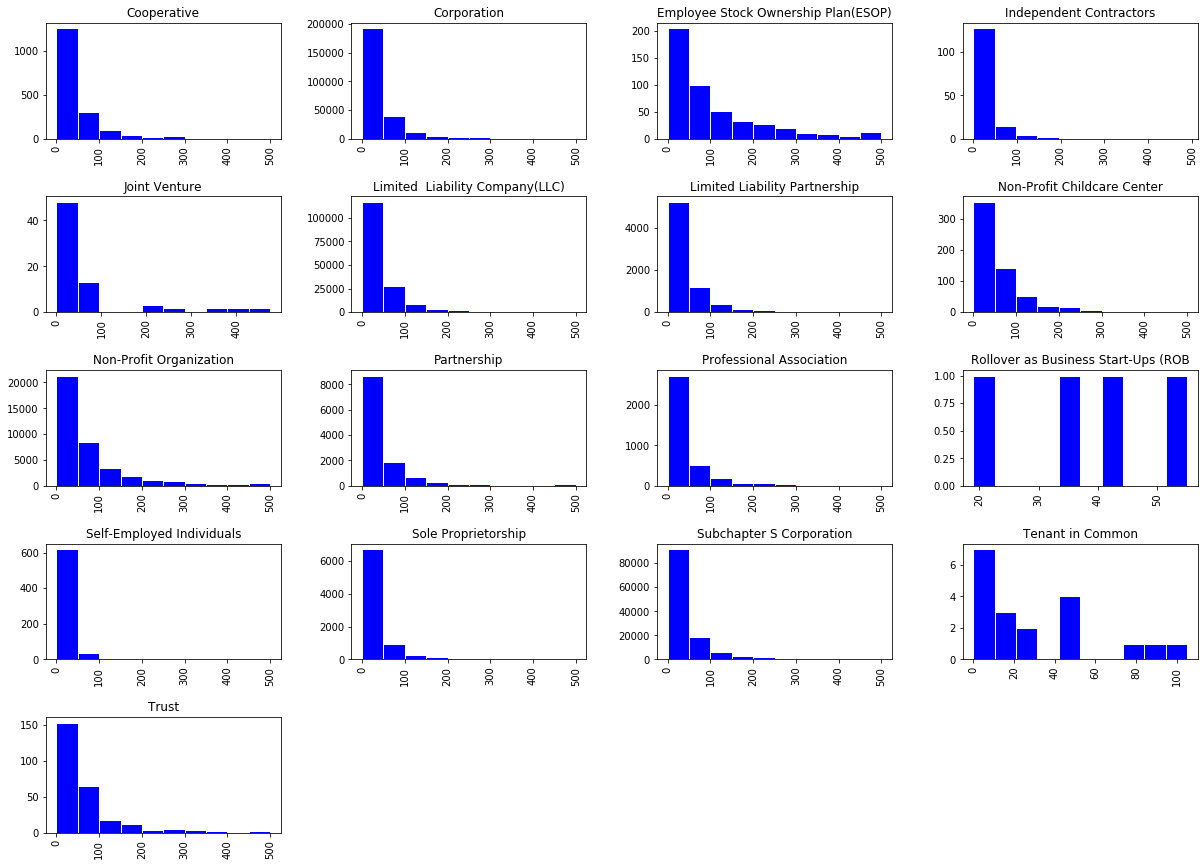

In [64]:
df.hist(column='JobsRetained', by = 'BusinessType', figsize=(20,15), grid = False, color = 'blue', edgecolor = 'white')

plt.xlabel('Jobs Retained', fontsize=12)
plt.ylabel('Types of business', fontsize=12)
plt.title('Jobs and business')

plt.show()

### What is the state with higher number of payrolls aproved? 

##### Task one: group by State and count data approved

In [167]:
df_temp = df.groupby(by='State').count()
df_temp = df_temp.rename({'DateApproved': 'Number of Loans Approved'}, axis='columns')
df_temp = df_temp['Number of Loans Approved'].sort_values(ascending=False)
all_values = list(df_temp)
states = list(df_temp.index)

##### Task two: sort values and graphic them

In [168]:
df_temp = df_temp['Number of Loans Approved'].sort_values(ascending=False)
df_temp = df_temp.head(10)
df_temp
all_values = list(df_temp)

KeyError: 'Number of Loans Approved'

###### Creating a bin for graphic

In [21]:
states = df_temp.index
statesList = []

for state in states:
    statesList.append(state)
        
statesList

['CA', 'TX', 'NY', 'FL', 'IL', 'PA', 'OH', 'NJ', 'MI', 'GA']

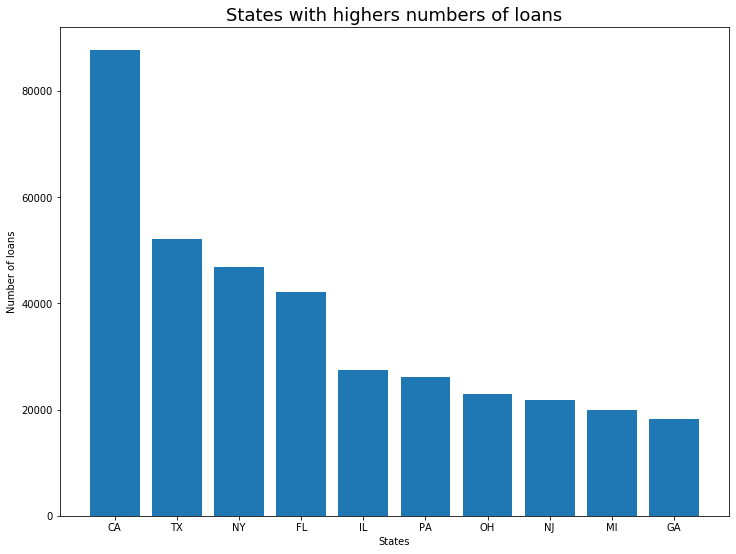

In [22]:
plt.figure(figsize=(12,9))
plt.bar(statesList, df_temp, width=.80)
plt.title('States with highers numbers of loans', fontsize=18)
plt.xlabel("States")
plt.ylabel("Number of loans")
plt.show()

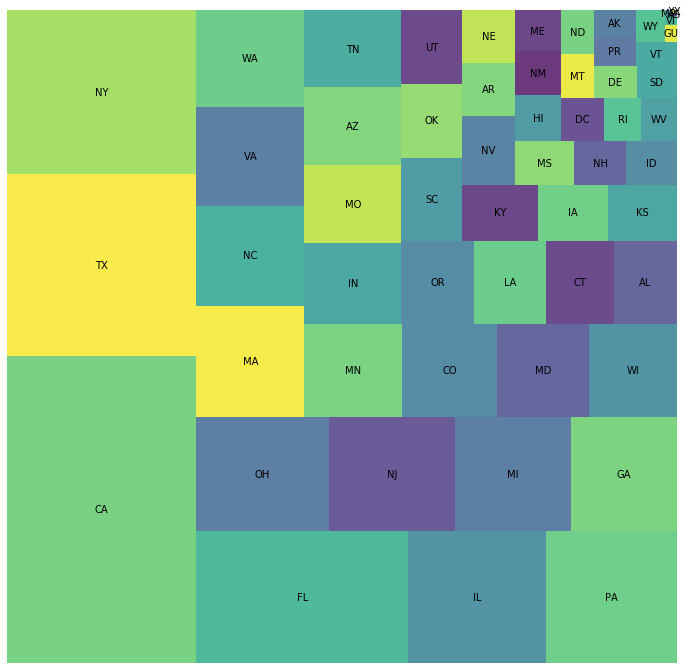

In [92]:
fig, ax = plt.subplots(1, figsize=(12,12))
squarify.plot(sizes= all_values, label= df_temp.index, alpha=.8)
plt.axis('off')
plt.show()

### How many values of loans were disponible? 

##### Making a count of values from column LoanRange

In [66]:
df_temp2 = df['LoanRange'].drop_duplicates().sort_values(ascending=False)
labels = list(df_temp2)
labels

['e $150,000-350,000',
 'd $350,000-1 million',
 'c $1-2 million',
 'b $2-5 million',
 'a $5-10 million']

In [67]:
values = df['LoanRange'].value_counts()
values

e $150,000-350,000      379048
d $350,000-1 million    199455
c $1-2 million           53029
b $2-5 million           24837
a $5-10 million           4840
Name: LoanRange, dtype: int64

In [68]:
## converting numbers to percentage

numbers = df['LoanRange'].count()
percentage_values = []

for number in list(values):
    number = number / numbers
    percentage_values.append("{:.0%}".format(number))

percentage_values

['57%', '30%', '8%', '4%', '1%']

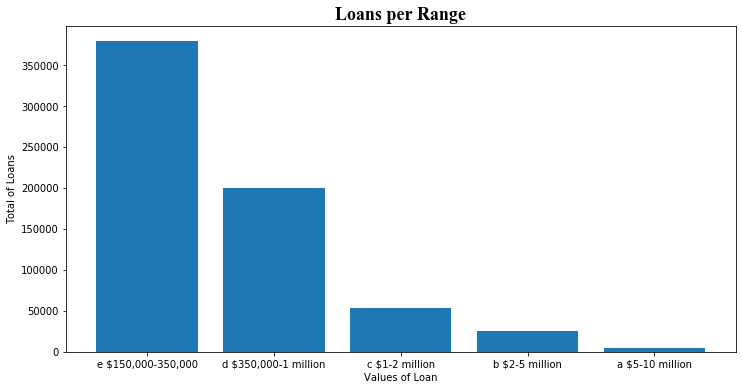

In [69]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Loans per Range', fontdict={'fontname': 'Times New Roman', 'fontsize': 18})
ax.bar(labels, values) # x -> labels, y -> values
ax.set_xlabel('Values of Loan')
ax.set_ylabel('Total of Loans')

plt.show()

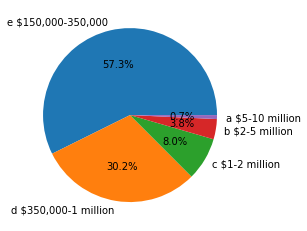

In [11]:
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()

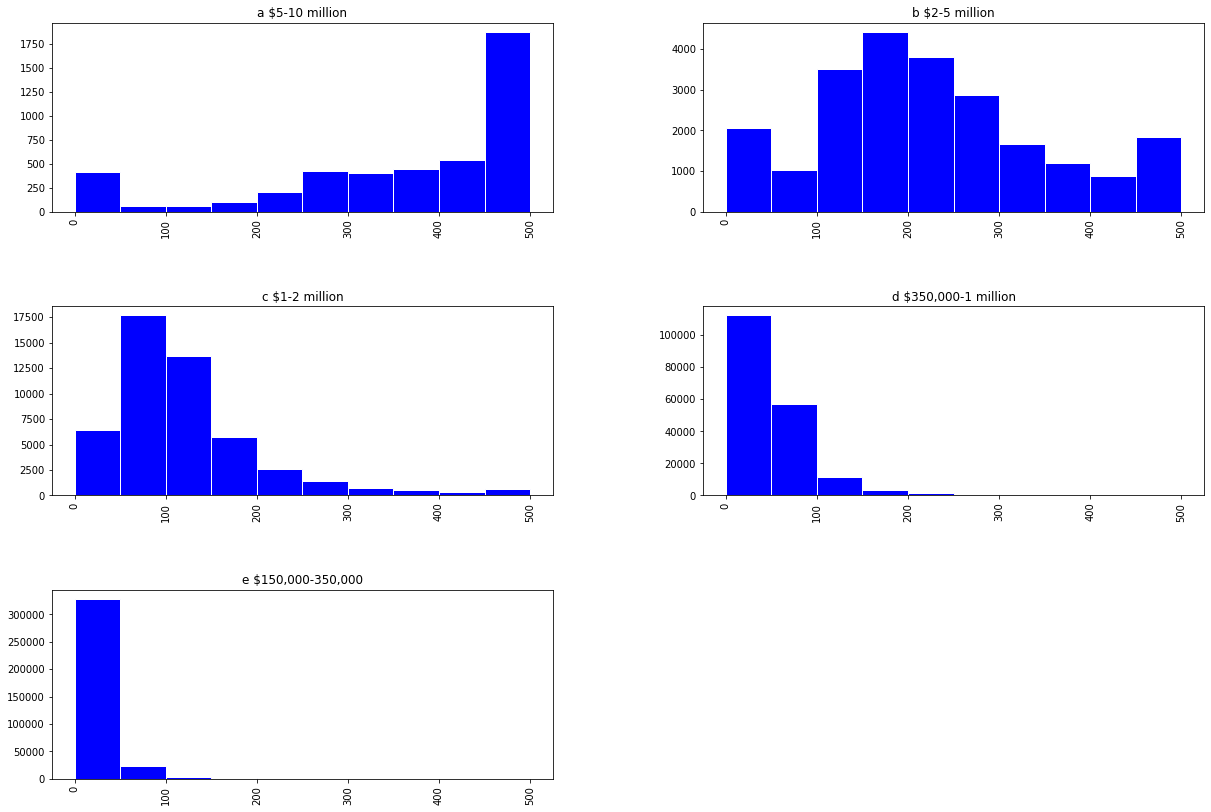

In [72]:
df.hist(column='JobsRetained', by='LoanRange', figsize=(20,14), color='blue', edgecolor='white')
plt.show()

In [116]:
df_temp = df.dropna()
df_temp

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
255265,"e $150,000-350,000",BUCKLIN HOSPITAL DISTRICT,505 W Elm,BUCKLIN,KS,67834.0,623110.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,34.0,2020-06-26,"the Farmers State Bank of Bucklin, Kansas",KS - 01
256168,"e $150,000-350,000","HOSPICE OF THE PRAIRIE, INC.",PO BOX 1298 200 4th Circle,DODGE CITY,KS,67801.0,621610.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,29.0,2020-04-09,"the Farmers State Bank of Bucklin, Kansas",KS - 01
318076,"e $150,000-350,000",CATHOLIC SOCIAL SERVICES OF THE UPPER PENINSULA,347 ROCK ST,MARQUETTE,MI,49855.0,813319.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,23.0,2020-04-15,mBank,MI - 01
308404,b $2-5 million,SCHOOLCRAFT MEMORIAL HOSPITAL,7870 W US HIGHWAY 2,MANISTIQUE,MI,49854.0,622110.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,306.0,2020-04-06,mBank,MI - 01
308489,b $2-5 million,"THUNDER BAY COMMUNITY HEALTH SERVICE, INC.",15774 STATE ST,HILLMAN,MI,49746.0,621498.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,149.0,2020-04-07,mBank,MI - 01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299642,"e $150,000-350,000","DORCHESTER COUNTY COMMISSION ON THE AGING, INC",2474 CAMBRIDGE BELTWAY,CAMBRIDGE,MD,21613.0,624120.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,15.0,2020-04-10,1880 Bank,MD - 01
176107,"e $150,000-350,000",SACRED HEART CATHOLIC CHURCH AND SCHOOL,5752 Blanding Blvd,JACKSONVILLE,FL,32244.0,813211.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,0.0,2020-04-27,121 Financial CU,FL - 04
179650,"e $150,000-350,000",TIM TEBOW FOUNDATION INC,7700 Sqaure Lake Blvd,JACKSONVILLE,FL,32256.0,813211.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,0.0,2020-04-07,121 Financial CU,FL - 04
158667,"e $150,000-350,000",BAYMEADOWS MISSIONARY BAPTIST CHURCH INC,4826 Baymeadows Road,JACKSONVILLE,FL,32217.0,813110.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,0.0,2020-04-27,121 Financial CU,FL - 04


In [119]:
## make a function

var25 = df_temp['JobsRetained'][df.LoanRange == 'e $150,000-350,000'][df.JobsRetained <= 25].sum()
var50 = df_temp['JobsRetained'][df.LoanRange == 'e $150,000-350,000'][df.JobsRetained > 25 and df.JobsRetained <= 50].sum()
var75 = df_temp['JobsRetained'][df.LoanRange == 'e $150,000-350,000'][df.JobsRetained > 50 and df.JobsRetained <= 75].sum()
var100 = df_temp['JobsRetained'][df.LoanRange == 'e $150,000-350,000'][df.JobsRetained > 75 and df.JobsRetained <= 100].sum()
varHIGH = df_temp['JobsRetained'][df.LoanRange == 'e $150,000-350,000'][df.JobsRetained > 100].sum()

c = [var25, var50, var75, var100, varHIGH]
d = ['less or equal than 25 jobs', 'less or equal than 50 jobs', 'less or equal than 75 jobs', 'less or equal than 100 jobs', 'higher than 100 jobs']

plt.pie(c, labels=d, autopct='%1.1f%%')
plt.show()

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [96]:
c

[7900745.0, 826179.0]

### Number of jobs retained

In [12]:
df.head(0)

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD


In [13]:
df['JobsRetained'][df.JobsRetained != 0][df.LoanRange == 'a $5-10 million'].dropna().mean()

389.66627050154506

##### How many jobs were retained based on states?

In [14]:
df_temp = df.dropna()
df_temp.head(3)

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,a $5-10 million,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723.0,813920.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,295.0,2020-04-14,"National Cooperative Bank, National Association",AK - 00
25,b $2-5 million,"ANCHORAGE COMMUNITY MENTAL HEALTH SERVICES, INC.",4020 FOLKER STREET,ANCHORAGE,AK,99508.0,621498.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,168.0,2020-04-09,First National Bank Alaska,AK - 00
39,b $2-5 million,"FAMILY CENTERED SERVICES OF ALASKA, INC.",1825 Marika Rd.,FAIRBANKS,AK,99709.0,621420.0,Non-Profit Organization,Unanswered,Male Owned,Unanswered,Y,145.0,2020-04-03,Northrim Bank,AK - 00


In [120]:
df_temp = df_temp.dropna().groupby(by='State').sum().sort_values(by='JobsRetained', ascending=False)

labels_state = list(df_temp.head(10).index)
values_jobs = list(df_temp['JobsRetained'].head(10))

values

e $150,000-350,000      379048
d $350,000-1 million    199455
c $1-2 million           53029
b $2-5 million           24837
a $5-10 million           4840
Name: LoanRange, dtype: int64

In [121]:
states = df_temp.head(10).index
jobs = df_temp['JobsRetained'].head(10)
jobs

State
CA    324187.0
NY    271449.0
TX    189024.0
PA    146410.0
IL    141241.0
FL    139672.0
OH    126452.0
MA     97802.0
MN     86760.0
MI     83666.0
Name: JobsRetained, dtype: float64

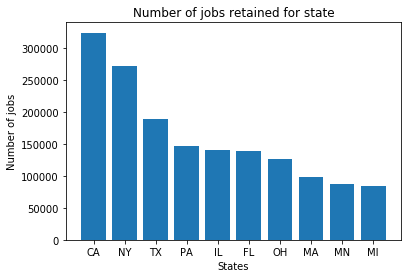

In [43]:
fig, ax = plt.subplots()

ax.bar(states, jobs)

ax.set_title('Number of jobs retained for state')
ax.set_xlabel('States')
ax.set_ylabel('Number of jobs')

plt.show()

##### Converting strings to dates

In [122]:
def new_data(dateStr):
    return pd.to_datetime(dateStr)

df['DateApproved'] = df['DateApproved'].apply(new_data)

### Creating a graphic of lines with jobs retained

In [133]:
labelsData = df['DateApproved'].drop_duplicates()
labelsData = labelsData.sort_values(ascending=True)
labelsData

309657   2020-04-03
308098   2020-04-04
651030   2020-04-05
308404   2020-04-06
308518   2020-04-07
            ...    
255265   2020-06-26
88737    2020-06-27
110131   2020-06-28
456593   2020-06-29
248301   2020-06-30
Name: DateApproved, Length: 79, dtype: datetime64[ns]

In [134]:
valuesData = df.groupby('DateApproved').sum()
valuesData = valuesData['JobsRetained']
valuesData

DateApproved
2020-04-03     515019.0
2020-04-04     857755.0
2020-04-05    1075808.0
2020-04-06    1508140.0
2020-04-07    1935181.0
                ...    
2020-06-26      38569.0
2020-06-27      10416.0
2020-06-28       9403.0
2020-06-29      38013.0
2020-06-30      48587.0
Name: JobsRetained, Length: 79, dtype: float64

#### First try with plot from plt

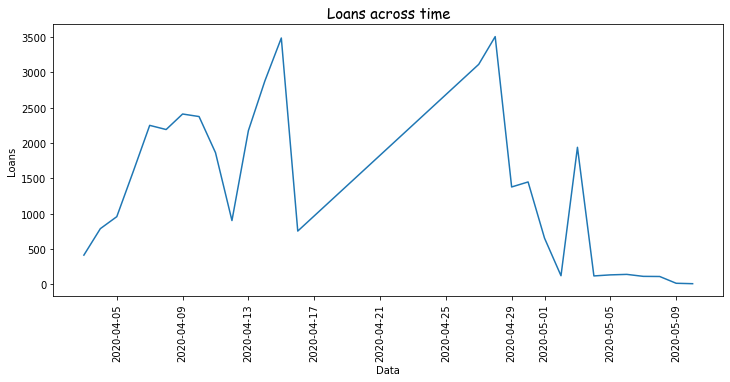

In [164]:
plt.figure(figsize=(12,5))
plt.plot(labelsData, valuesData)
plt.title("Loans across time", fontdict={'fontname': 'Comic Sans MS', 'fontsize': 15})
plt.xticks(rotation=90, fontstretch='ultra-expanded')
plt.xlabel("Data")
plt.ylabel("Loans")
plt.show()

#### Second try with pivot table from pandas

### Creating a second dataframe with dates as index

In [149]:
df_dates = pd.read_csv('PPP_ORIGINAL.csv', parse_dates=["DateApproved"], index_col='DateApproved').dropna()
df_dates = df_dates.sort_values(by='DateApproved', ascending=True)

In [162]:
labelsData = df_dates['20200401':'20200510'].index.drop_duplicates()
labelsData = labelsData.sort_values(ascending=True)
labelsData

DatetimeIndex(['2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
               '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
               '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10'],
              dtype='datetime64[ns]', name='DateApproved', freq=None)

In [161]:
valuesData = df_dates['20200401':'20200510'].groupby('DateApproved').count()
valuesData = valuesData['JobsRetained']
valuesData 

DateApproved
2020-04-03     411
2020-04-04     786
2020-04-05     956
2020-04-06    1596
2020-04-07    2250
2020-04-08    2191
2020-04-09    2411
2020-04-10    2375
2020-04-11    1863
2020-04-12     901
2020-04-13    2176
2020-04-14    2879
2020-04-15    3488
2020-04-16     752
2020-04-27    3115
2020-04-28    3508
2020-04-29    1377
2020-04-30    1448
2020-05-01     651
2020-05-02     119
2020-05-03    1939
2020-05-04     116
2020-05-05     131
2020-05-06     138
2020-05-07     110
2020-05-08     108
2020-05-09      12
2020-05-10       6
Name: JobsRetained, dtype: int64

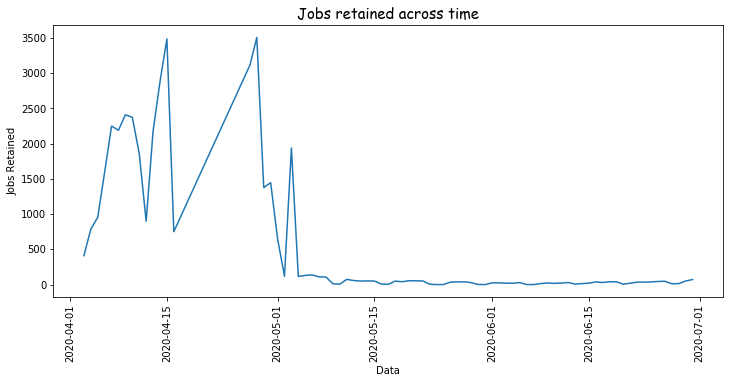

In [160]:
plt.figure(figsize=(12,5))
plt.plot(labelsData, valuesData)
plt.title("Loans across time", fontdict={'fontname': 'Comic Sans MS', 'fontsize': 15})
plt.xticks(rotation=90, fontstretch='ultra-expanded')
plt.xlabel("Data")
plt.ylabel("Jobs Retained")
plt.show()

### How many owners are male and female? 

In [193]:
df_temp = df.groupby('Gender').count().sort_values(by = 'LoanRange', ascending=False)

labelsG = list(df_temp.index[df_temp.index != 'Unanswered'])

valuesG = list(df_temp.LoanRange[df_temp.index != 'Unanswered'])

valuesG

[159611, 31352]

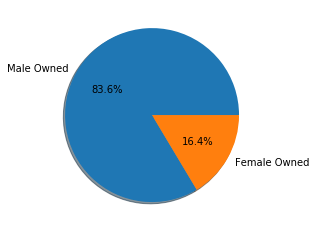

In [194]:
fig, ax = plt.subplots()
ax.pie(valuesG, labels=labelsG, shadow=True, autopct='%1.1f%%')
plt.show()

### What is the percentage of ethnicity in this dataset?

In [197]:
df_temp = df.groupby('RaceEthnicity').count().sort_values(by = 'LoanRange', ascending=False)

labelsR = list(df_temp.index[df_temp.index != 'Unanswered'])

valuesR = list(df_temp.LoanRange[df_temp.index != 'Unanswered'])

labelsR

['White',
 'Asian',
 'Hispanic',
 'Black or African American',
 'American Indian or Alaska Native',
 'Puerto Rican']

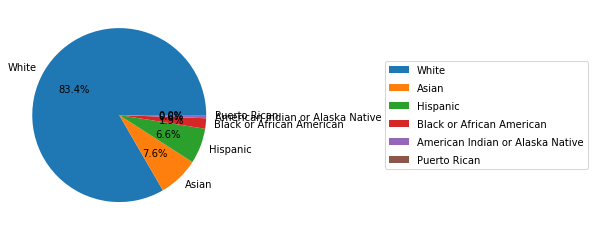

In [198]:
fig, ax = plt.subplots()
texts = ax.pie(valuesR, labels=labelsR, autopct='%1.1f%%')   
ax.legend(loc= 'center left', bbox_to_anchor=(1.7, 0.5), labelspacing=0.8)
plt.show()

In [28]:
countRE =  df['RaceEthnicity'].value_counts()
countRE 

Unanswered                          566708
White                                78782
Asian                                 7139
Hispanic                              6201
Black or African American             1827
American Indian or Alaska Native       551
Puerto Rican                             1
Name: RaceEthnicity, dtype: int64